<a href="https://colab.research.google.com/github/elyasncr/Pos_graduacao_DataScience/blob/main/1_Medidas_de_Tend%C3%AAncia_Central.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## A tendência central é uma medida de valores numa amostra que identifica os diferentes pontos centrais nos dados.
<br>

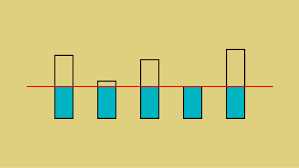

### As medidas mais comuns de tendência central são a média, a mediana e a moda.

<br>
<br>
<br>

### Vamos usar dados abertos do preço do Big Mac, desde 2000 a 2022, para diversos países. Os dados podem ser encontrados no Kaggle.

<br>

https://www.kaggle.com/datasets/vittoriogiatti/bigmacprice

#### Importando a biblioteca pandas (https://pandas.pydata.org)

In [ ]:
import pandas

#### Lendo os dados, que estão em csv

In [ ]:
df = pandas.read_csv('BigmacPrice.csv')

In [ ]:
df.head()

,date,currency_code,name,local_price,dollar_ex,dollar_price
0,2000-04-01,ARS,Argentina,2.50,1,2.50
1,2000-04-01,AUD,Australia,2.59,1,2.59
2,2000-04-01,BRL,Brazil,2.95,1,2.95
3,2000-04-01,GBP,Britain,1.90,1,1.90
4,2000-04-01,CAD,Canada,2.85,1,2.85


### Descrição das colunas

* **`date`** - Data do registro
* **`currency_code`** - Código ISO 4217 internacional da moeda do país
* **`name`** - Nome do país
* **`local_price`** - Preço do Big Mac na moeda local
* **`dollar_ex`** - Taxa de Conversão do dólar americano para a moeda local
* **`local_price`** - Preço do Big Mac em dólares americanos


#### Vamos olhar os tipos dos dados

In [ ]:
df.dtypes

date              object
currency_code     object
name              object
local_price      float64
dollar_ex          int64
dollar_price     float64
dtype: object

### Vamos filtrar os dados somente do mês de Julho de 2022

In [ ]:
df_filtered = df[df['date'] == '2022-07-01']

In [ ]:
df_filtered.head()

,date,currency_code,name,local_price,dollar_ex,dollar_price
1876,2022-07-01,ARS,Argentina,590.00,129,4.57
1877,2022-07-01,AUD,Australia,6.70,1,6.70
1878,2022-07-01,EUR,Austria,4.35,1,4.35
1879,2022-07-01,AZN,Azerbaijan,4.70,1,4.70
1880,2022-07-01,BHD,Bahrain,1.60,1,1.60


In [ ]:
df_filtered.count()

date             70
currency_code    70
name             70
local_price      70
dollar_ex        70
dollar_price     70
dtype: int64

#### Quantos países únicos nós temos?

In [ ]:
df_filtered.groupby('name').count()['date']

name
Argentina               1
Australia               1
Austria                 1
Azerbaijan              1
Bahrain                 1
                       ..
United Arab Emirates    1
United States           1
Uruguay                 1
Venezuela               1
Vietnam                 1
Name: date, Length: 70, dtype: int64

### Temos 1 linha por país! Dessa forma, vamos calcular as medidas de tendência central. Salvaremos também os dados de Julho/2022 pois os reutilizaremos mais para frente.

In [ ]:
df_filtered.to_csv('BigmacPriceJuly2022.csv', index = False)

---------

`Moda`


## Já bastante conhecida,  a `Moda` é uma medida estatística de tendência central, que interessa sempre que estivermos em busca dos valores mais comuns de um dado.

É o valor dos dados que ocorre com a maior frequência, ou seja, o valor que mais se repete dentro de uma série de observações. 

![alt text](https://blog.professorferretto.com.br/wp-content/uploads/2017/11/moda.png)

In [ ]:
df = pandas.read_csv('BigmacPriceJuly2022.csv')

## O pandas tem uma função para a moda, tornando bem simples o seu cálculo!

### Vamos calcular a moda do preço do Big Mac em dólares americanos

In [ ]:
df['dollar_price'].mode()

0    4.00
1    4.58
Name: dollar_price, dtype: float64

Repare que o resultado é uma série do Pandas!

### Vamos ver quantas vezes esses valores ocorreram

In [ ]:
df['dollar_price'].value_counts()

4.58    3
4.00    3
3.50    2
5.67    2
3.71    2
       ..
2.85    1
2.30    1
1.30    1
6.70    1
2.95    1
Name: dollar_price, Length: 61, dtype: int64

### Podemos ter mais de um valor para a moda!!

--- 

`Média`

## A famosa média!! Ela é bastante relevante por ser muito fácil de ser calculada, além de ser muito popular.

![alt text](https://us.123rf.com/450wm/jameschipper/jameschipper1704/jameschipper170400133/76165125-credit-score-gauge.jpg?ver=6)


## Calculamos a média simplesmente somando todos os valores e dividindo pelo tamanho da amostra.

![alt text](https://cdn.educba.com/academy/wp-content/uploads/2019/03/Average-Formula.jpg)


A média é uma importante medida que busca expressar a tendência central dos dados de interesse. 

### É muito simples calcular a média com pandas

#### Vamos calcular a média do preço do Big Mac em dólares americanos

In [ ]:
df['dollar_price'].mean()

4.003571428571429

Esse é o valor médio do preço do Big Mac no mundo, em dólares!

## Apesar de ser muito popular e fácil de ser calculada, precisamos tomar cuidados especiais com a média. Isso porque ela é `facilmente` influenciada por valores extremos na nossa amostra!


![alt text](https://images.nagwa.com/figures/explainers/845148137695/2.svg)

In [ ]:
def media(lista):
    return sum(lista)/len(lista)

### Vamos calcular a média de algumas listas de alturas de pessoas e ver como a média se comporta em cada caso.

A primeira lista tem alturas bem próximas uma das outras

In [ ]:
lista_alturas_1 = [1.67, 1.72, 1.70, 1.69, 1.74, 1.71]

In [ ]:
media(lista_alturas_1)

1.705

A segunda lista tem alturas mais espaçadas uma das outras

In [ ]:
lista_alturas_2 = [1.60, 1.66, 1.72, 1.69, 1.78, 1.77]

In [ ]:
media(lista_alturas_2)

1.7033333333333331

A terceira lista tem uma altura bem menor do que as outras

In [ ]:
lista_alturas_3 = [1.20, 1.72, 1.70, 1.69, 1.74, 1.71]

In [ ]:
media(lista_alturas_3)

1.626666666666667

Finalmente, a quarta lista tem uma altura bem maior do que as outras

In [ ]:
lista_alturas_4 = [1.67, 1.72, 1.70, 1.69, 1.74, 2.24]

In [ ]:
media(lista_alturas_4)

1.7933333333333332

## Viu o que acontece com a média?

---

`Mediana`

## A `mediana` é uma medida de tendência central muito interessante. Ela faz uma divisão exatamente no meio dos nossos dados. É o valor do meio do nosso conjunto de dados. 


![alt text](https://temasdeenfermeria.com.ar/wp-content/uploads/2012/06/mediana.jpg)


### Para que a mediana seja calculada, primeiramente precisamos ordenar os dados para que então seja identificado o valor do meio. Por isso, a mediana é relativamente custosa de ser calculada, principalmente em cenários de big data.
<br>

![alt text](https://educa.ibge.gov.br/images/vamoscontar/recursos/mediana/mediana_animacao4.gif)

### É bem fácil calcular a mediana com pandas

In [ ]:
df['dollar_price'].median()

3.9050000000000002

Essa é a mediana do preço do Big Mac no mundo, em dólares!

### Ao contrário da média, a mediana não é facilmente influenciada por valores extremos!

In [ ]:
import numpy as np

Lista equilibrada

In [ ]:
lista_alturas_1 = [1.67, 1.72, 1.70, 1.69, 1.74, 1.71]

In [ ]:
media(lista_alturas_1)

1.705

In [ ]:
np.median(lista_alturas_1)

1.705

Lista mais espaçada

In [ ]:
lista_alturas_2 = [1.60, 1.66, 1.72, 1.69, 1.78, 1.77]

In [ ]:
media(lista_alturas_2)

1.7033333333333331

In [ ]:
np.median(lista_alturas_2)

1.705

Lista com uma altura bem menor do que as outras

In [ ]:
lista_alturas_3 = [1.20, 1.72, 1.70, 1.69, 1.74, 1.71]

In [ ]:
media(lista_alturas_3)

1.626666666666667

In [ ]:
np.median(lista_alturas_3)

1.705

Lista com uma altura bem maior do que as outras

In [ ]:
lista_alturas_4 = [1.67, 1.72, 1.70, 1.69, 1.74, 2.24]

In [ ]:
media(lista_alturas_4)

1.7933333333333332

In [ ]:
np.median(lista_alturas_4)

1.71

## A mediana quase não se altera!